In [1]:
import torchvision
from torchvision.datasets import STL10
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transformations for the images (resize, grayscale, etc.)
transform = transforms.Compose([
    transforms.Grayscale(),                # Convert images to grayscale
    transforms.Resize((32, 32)),           # Resize to 32x32
    transforms.ToTensor(),                 # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))   # Normalize the data
])

In [3]:
# Load training and testing datasets
train_dataset = STL10(root='./data', split='train', download=True, transform=transform)
test_dataset = STL10(root='./data', split='test', download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=5000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [5]:
# Extract data and labels
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# Flatten images for KNN
train_images = train_images.view(train_images.size(0), -1)
test_images = test_images.view(test_images.size(0), -1)


In [6]:
# Convert labels to numpy arrays
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()

In [7]:
# Accuracy with k 
knn_model = KNeighborsClassifier(n_neighbors=3)  
knn_model.fit(train_images, train_labels)
test_predictions = knn_model.predict(test_images)
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy with k=3: {accuracy * 100:.2f}%")


Accuracy with k=3: 23.50%


In [8]:
import matplotlib.pyplot as plt

# Define class labels
classes = ['Airplane', 'Bird', 'Car', 'Cat', 'Deer', 'Dog', 'Horse', 'Monkey', 'Ship', 'Truck']

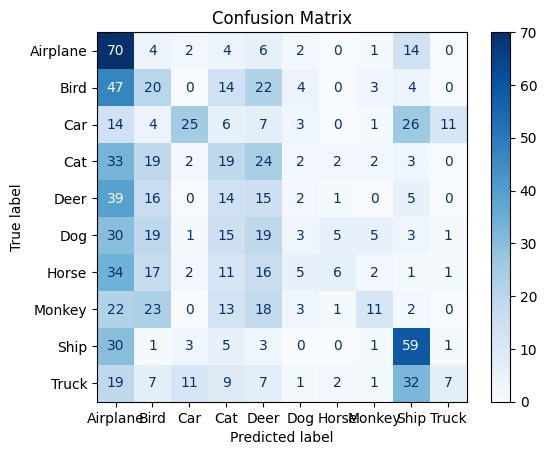

In [9]:
# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [10]:
# ROC Curve
# Binarize the labels for multi-class ROC
test_labels_binarized = label_binarize(test_labels, classes=range(len(classes)))
y_score = knn_model.predict_proba(test_images)  # KNN must support predict_proba for ROC


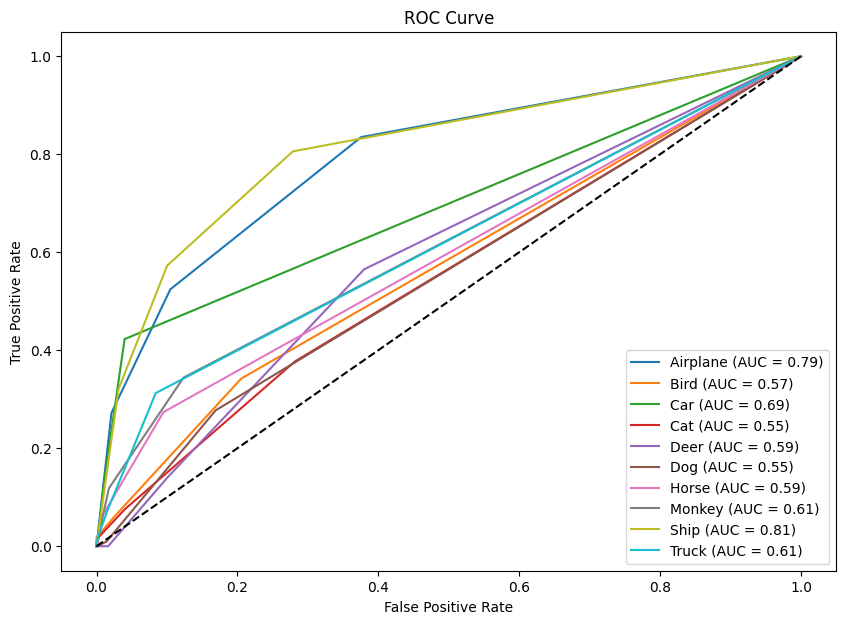

In [11]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Class: Airplane
Precision: 0.21
Recall: 0.68
------------------------------
Class: Bird
Precision: 0.15
Recall: 0.18
------------------------------
Class: Car
Precision: 0.54
Recall: 0.26
------------------------------
Class: Cat
Precision: 0.17
Recall: 0.18
------------------------------
Class: Deer
Precision: 0.11
Recall: 0.16
------------------------------
Class: Dog
Precision: 0.12
Recall: 0.03
------------------------------
Class: Horse
Precision: 0.35
Recall: 0.06
------------------------------
Class: Monkey
Precision: 0.41
Recall: 0.12
------------------------------
Class: Ship
Precision: 0.40
Recall: 0.57
------------------------------
Class: Truck
Precision: 0.33
Recall: 0.07
------------------------------

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.21      0.68      0.32       103
        Bird       0.15      0.18      0.16       114
         Car       0.54      0.26      0.35        97
         Cat       0.17      0.18 

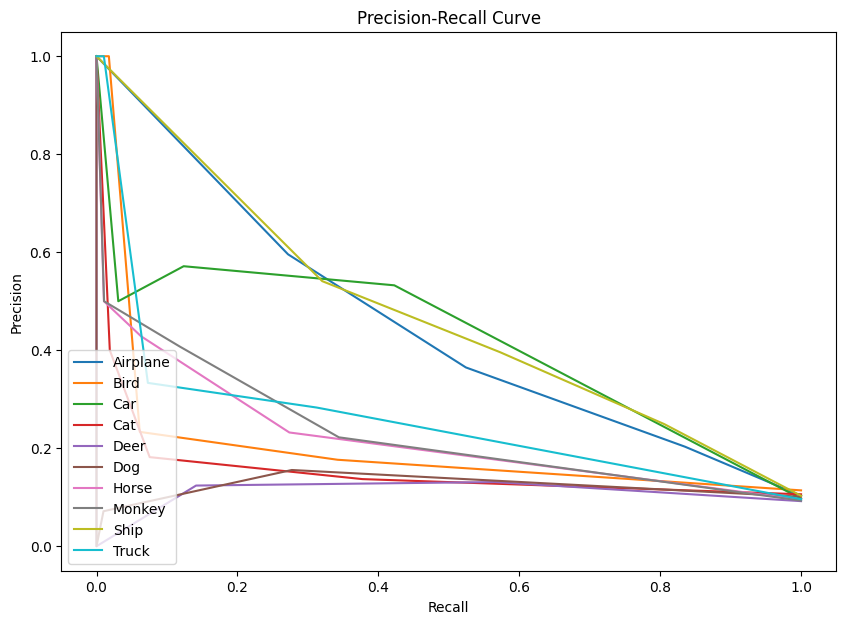

In [12]:
from sklearn.metrics import precision_score, recall_score, classification_report

# حساب Precision و Recall
precision = precision_score(test_labels, test_predictions, average=None)  # حساب Precision لكل فئة
recall = recall_score(test_labels, test_predictions, average=None)  # حساب Recall لكل فئة

# طباعة Precision و Recall لكل فئة
for i in range(len(classes)):
    print(f"Class: {classes[i]}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print("-" * 30)

# يمكن طباعة تقرير شامل يحتوي على Precision و Recall لكل فئة
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions, target_names=classes))

# رسم Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    precision_class, recall_class, _ = precision_recall_curve(test_labels_binarized[:, i], y_score[:, i])
    plt.plot(recall_class, precision_class, label=f"{classes[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


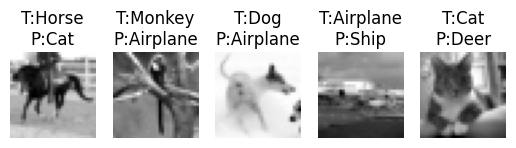

In [13]:
# Visualize first 5 test images and predictions
for i in range(5):
    img = test_images[i].view(32, 32).numpy()  # Reshape for display
    true_label = test_labels[i].item()
    predicted_label = test_predictions[i]

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{classes[true_label]}\nP:{classes[predicted_label]}")
    plt.axis('off')
plt.show()


In [14]:
# حساب عدد الأخطاء (misclassified samples)
num_errors = (test_predictions != test_labels).sum()

# حساب نسبة الخطأ كخسارة
loss = num_errors / len(test_labels)
print(f"Loss (Error Rate): {loss:.4f}")


Loss (Error Rate): 0.7650
